<a href="https://colab.research.google.com/github/munichbughunter/flight_data_analysis_python/blob/main/NYC_Flight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC FLIGHT DATA ANALYSIS

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [3]:
flight_data = pd.read_csv("/content/flight_data.csv")
flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00


In [4]:
df_summary = flight_data.describe()
df_summary

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.00,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00
mean,2013.00,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23
std,0.00,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30
min,2013.00,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00
25%,2013.00,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00
50%,2013.00,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00
75%,2013.00,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00
max,2013.00,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00


In [61]:
# 1. Date
flight_data['DATE'] = pd.to_datetime(flight_data[['year','month','day']], yearfirst=True)

# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
flight_data['MONTH_desc'] = flight_data['month'].apply(lambda m: month_dict[m])

flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00,2013-01-01,01- January


In [62]:
rows, cols = flight_data.shape
print("Number of rows: ", rows)
print("Number of colums", cols)

Number of rows:  336776
Number of colums 21


In [63]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            336776 non-null  int64         
 1   month           336776 non-null  int64         
 2   day             336776 non-null  int64         
 3   dep_time        328521 non-null  float64       
 4   sched_dep_time  336776 non-null  int64         
 5   dep_delay       328521 non-null  float64       
 6   arr_time        328063 non-null  float64       
 7   sched_arr_time  336776 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         336776 non-null  object        
 10  flight          336776 non-null  int64         
 11  tailnum         334264 non-null  object        
 12  origin          336776 non-null  object        
 13  dest            336776 non-null  object        
 14  air_time        327346 non-null  flo

# Copy flight_data after dropping null values

In [73]:
flt_data_cp = flight_data.dropna()
flt_data_cp.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00,2013-01-01,01- January


# Number of scheduled departures planned by carriers in 2013

In [74]:
carrier_count = flight_data['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

# Graphical representation of carriers scheduled flights in numbers and %

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


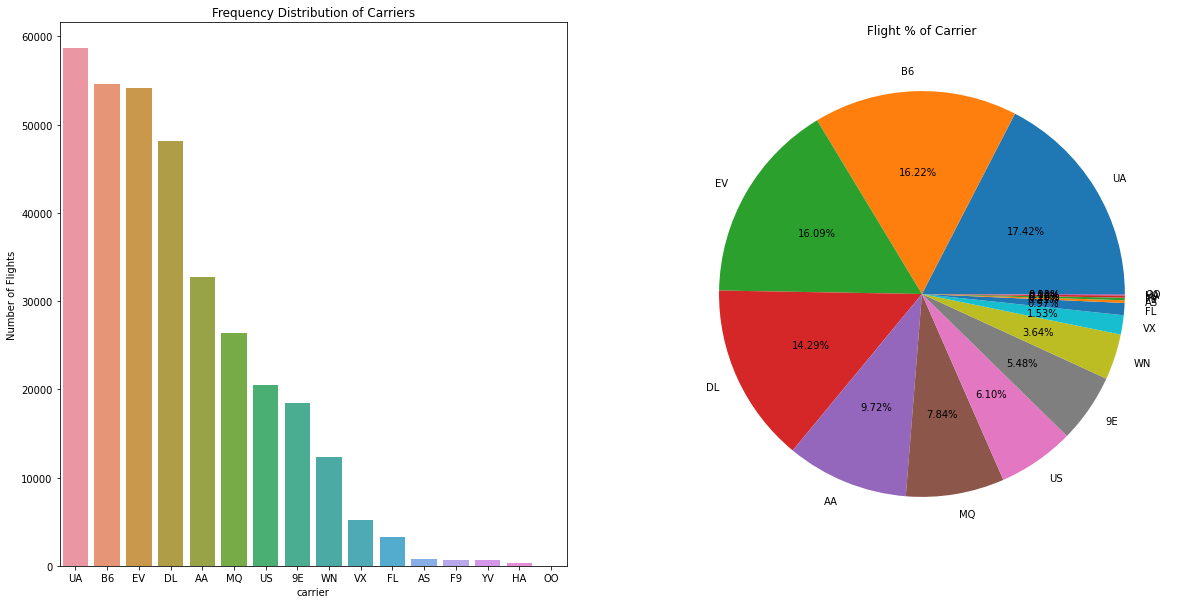

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = flight_data['carrier'].value_counts().index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

# Overall pattern of departure time from NYC airports

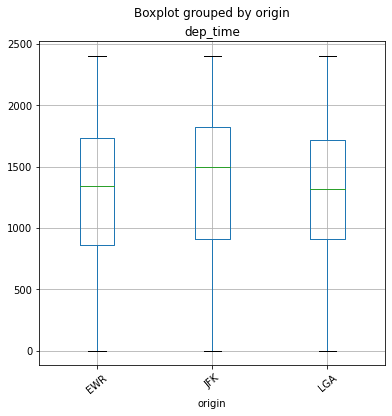

The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the departure time of 1800 and middle data point for departure is 1500 


In [76]:
flt_data_cp.boxplot('dep_time','origin', rot = 40, figsize=(6,6))
plt.show()

The highest IQ range (900 to 1800) is for JFK, where 75% flights are falling under the departure time of 1800 and middle data point for departure is 1500

# Number of scheduled departure from different origin

In [77]:
allflight_NYC=flt_data_cp['dest'].unique()    
allflightcount_NYC=len(allflight_NYC)      # Total number of destination is 104
print("The total number of destination flight from NYC is"+ "::" ,allflightcount_NYC)
print('\n')

flt_data_cp['origin'].value_counts()

The total number of destination flight from NYC is:: 104




EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


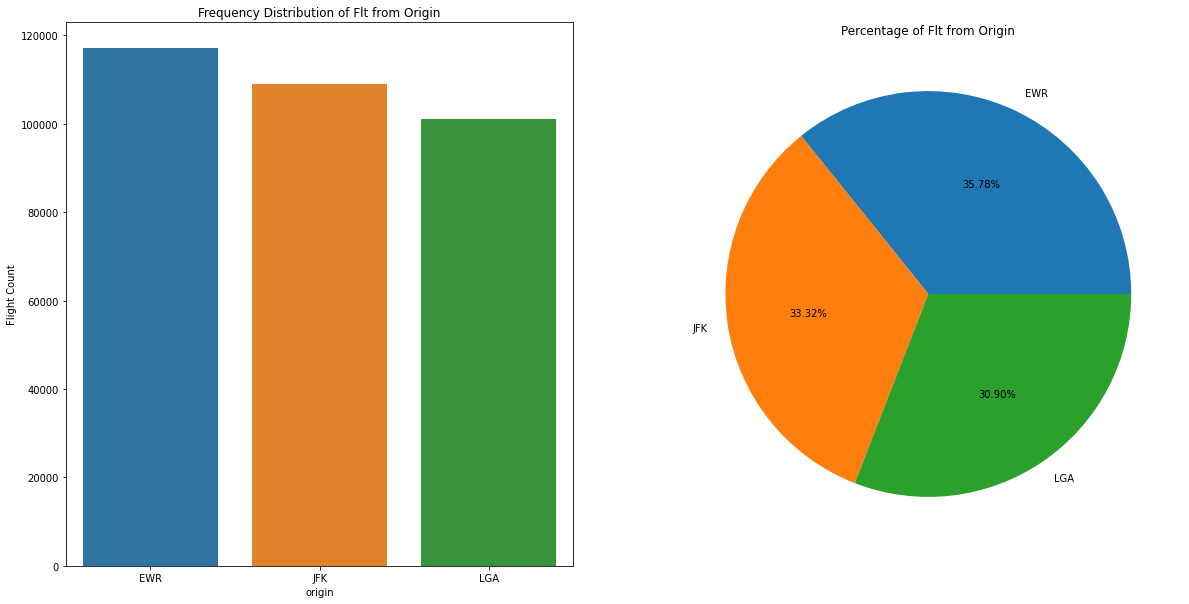

In [78]:
origin_count = flt_data_cp['origin'].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_cp['origin'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Percentage of Flt from Origin')
ax[1].set_ylabel('')
sns.countplot('origin',order = flt_data_cp['origin'].value_counts().index, data=flt_data_cp,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from Origin')
ax[0].set_ylabel('Flight Count')
plt.show()

# Number of scheduled arrival at unique destination

In [79]:
Destination= flight_data['dest'].value_counts().sort_values(ascending=False).head(15)
Destination

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
DFW     8738
RDU     8163
TPA     7466
DEN     7266
Name: dest, dtype: int64

# Top 10 destination flight from NYC in bar graph

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


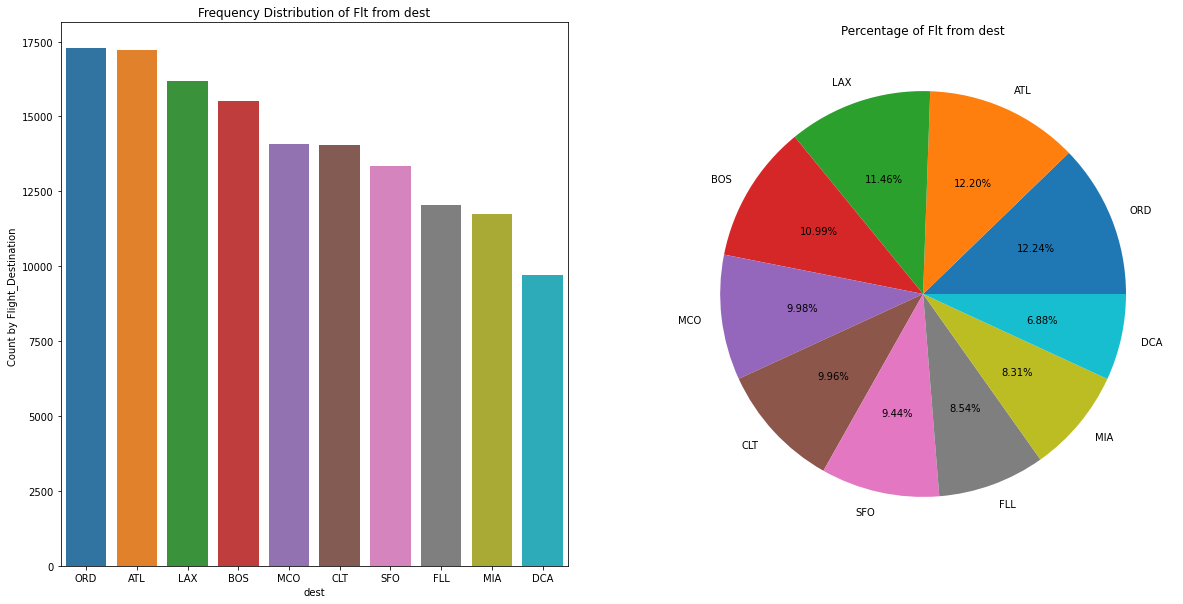

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,10))
flight_data['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                
ax[1].set_title('Percentage of Flt from dest')
ax[1].set_ylabel('')
sns.countplot('dest',order = flight_data['dest'].sort_values(ascending=False).value_counts().head(10).index, data=flight_data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Flt from dest')
ax[0].set_ylabel('Count by Flight_Destination ')
plt.show()

# Top 10 destination flight from NYC 

The top_10 destination flight from NYC are


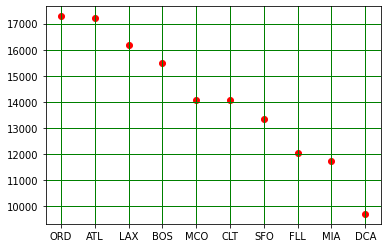

,dest,month
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [81]:
dest_count=flight_data.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='g', linewidth=1)
plt.show()
top_dest_flight

#  Maximum number of flights headed to unique destination from Origin.

In [82]:
dest_flight = flight_data.groupby('origin')['dest'].value_counts()

dest_flight.head(10)

origin  dest
EWR     ORD     6100
        BOS     5327
        SFO     5127
        CLT     5026
        ATL     5022
        MCO     4941
        LAX     4912
        IAH     3973
        FLL     3793
        DTW     3178
Name: dest, dtype: int64

# Total number of unique Airline headed to BOS from NYC

In [83]:
BOS_dest=flight_data[flight_data['dest']=='BOS']
Carrier_count=(BOS_dest['carrier']).unique()

print("Carrier fly to BOS", Carrier_count)
print('\n')

print("Total number of Carrier  headed to 'BOS' from NYC is",len(Carrier_count))
print('\n')

BOS_dest_count=BOS_dest['tailnum'].unique()
print("Total unique aircraft  headed to 'BOS' from NYC is",len(BOS_dest_count))
print('\n')

Carrier fly to BOS ['B6' 'AA' 'DL' 'UA' 'US' '9E' 'EV']


Total number of Carrier  headed to 'BOS' from NYC is 7


Total unique aircraft  headed to 'BOS' from NYC is 1308




# Average Monthly Departure Delay for Carrier

In [84]:
Monthly_Avg_Delay= flt_data_cp.groupby(['carrier','MONTH_desc'], axis=0, as_index=True).agg({'dep_delay':'mean'})
Monthly_Avg_Delay.head(15)

dep_delay
carrier MONTH_desc              
9E      01- January        16.58
        02- February       16.39
        03- March          13.28
        04- April          13.45
        05- May            22.64
        06- June           28.31
        07- July           30.44
        08- August         17.11
        09- September       7.60
        10- October         9.33
        11- November        7.44
        12- December       19.27
AA      01- January         6.97
        02- February        8.24
        03- March           8.70

# Monthly Average Departure Departure Delay

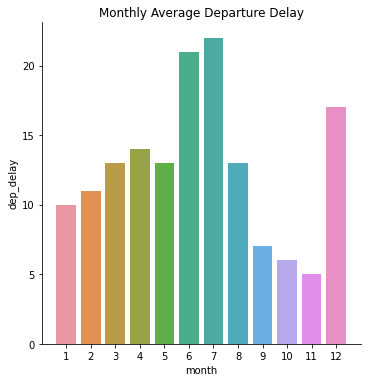

In [85]:
monthly_delay = flight_data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

# Average delay sort by Carrier in 2013 (inclusive early arrival)

In [86]:
flt_data_cp.groupby('carrier').agg(np.size)                 
top_delay = flt_data_cp.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(16)

arr_delay      
             size  mean
carrier                
F9         681.00 21.92
FL        3175.00 20.12
EV       51108.00 15.80
YV         544.00 15.56
OO          29.00 11.93
MQ       25037.00 10.77
WN       12044.00  9.65
B6       54049.00  9.46
9E       17294.00  7.38
UA       57782.00  3.56
US       19831.00  2.13
VX        5116.00  1.76
DL       47658.00  1.64
AA       31947.00  0.36
HA         342.00 -6.92
AS         709.00 -9.93

# Average arrival delay by carrier in 2013   (inclusive early arrival)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


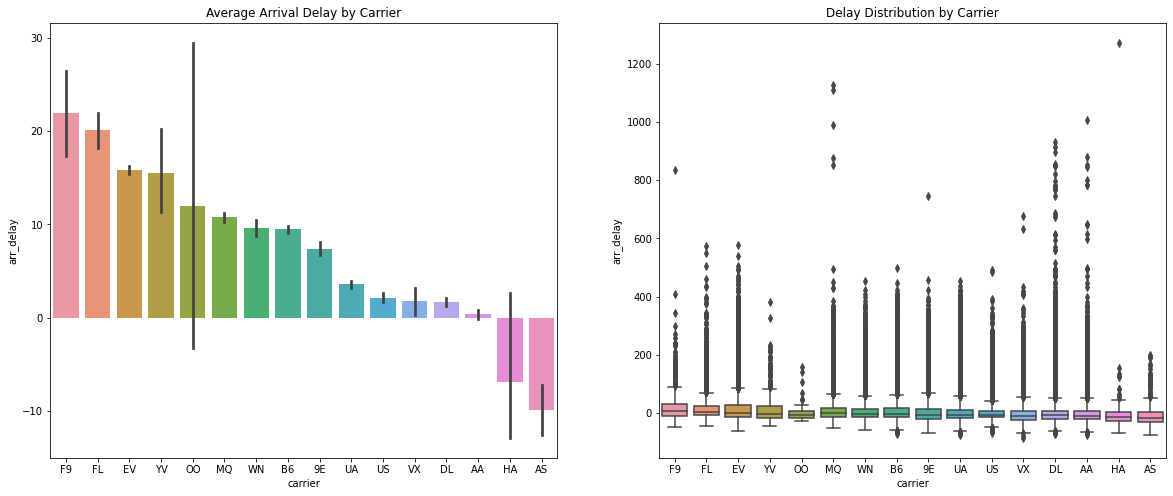

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


In [87]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=flt_data_cp,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=flt_data_cp,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

# Average delay for destination in 2013

In [88]:
flt_data_cp.groupby('dest').agg(np.size)  # size() is calculating the count
airport_delay = flt_data_cp.groupby('dest').agg({'arr_delay' :[np.size,np.mean]})
                                                                

airport_delay.sort_values([('arr_delay','mean')], ascending=False).head(10)

arr_delay      
          size  mean
dest                
CAE     106.00 41.76
TUL     294.00 33.66
OKC     315.00 30.62
JAC      21.00 28.10
TYS     578.00 24.07
MSN     556.00 20.20
RIC    2346.00 20.11
CAK     842.00 19.70
DSM     523.00 19.01
GRR     728.00 18.19

# Top_10_arr_delay_for Destination with sample size>1000

In [89]:
top_arr_delay = airport_delay['arr_delay']['size'] >= 1000       # only variable with sample size >= 1000 will be considered 

airport_delay[top_arr_delay].sort_values([('arr_delay', 'mean')], ascending=False)[:10]

arr_delay      
          size  mean
dest                
RIC    2346.00 20.11
CVG    3725.00 15.36
MCI    1885.00 14.51
MKE    2709.00 14.17
GSO    1492.00 14.11
IAD    5383.00 13.86
DAY    1399.00 12.68
SDF    1104.00 12.67
MDW    4025.00 12.36
JAX    2623.00 11.84

# Departure_Delay status classifications

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

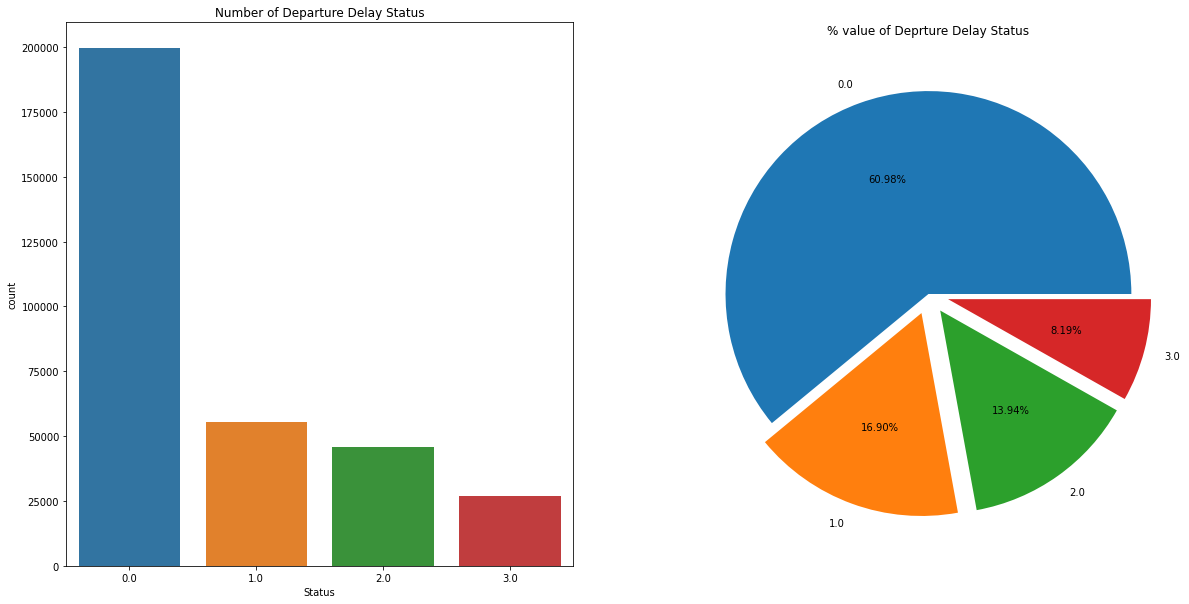

In [90]:
flt_data_cp.loc[flt_data_cp['dep_delay'] <= 0, 'Status'] = 0
flt_data_cp.loc[flt_data_cp['dep_delay'] >= 1, 'Status'] = 1
flt_data_cp.loc[flt_data_cp['dep_delay'] >= 15, 'Status'] = 2
flt_data_cp.loc[flt_data_cp['dep_delay'] >= 60, 'Status'] = 3

# Departure_Delay_status_graph


In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
flt_data_cp['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)
                                                       
ax[1].set_title('% value of Deprture Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_cp['Status'].value_counts().index, data=flt_data_cp,ax=ax[0])
ax[0].set_title('Number of Departure Delay Status')
plt.show()

# Arrival_Delay status classification

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

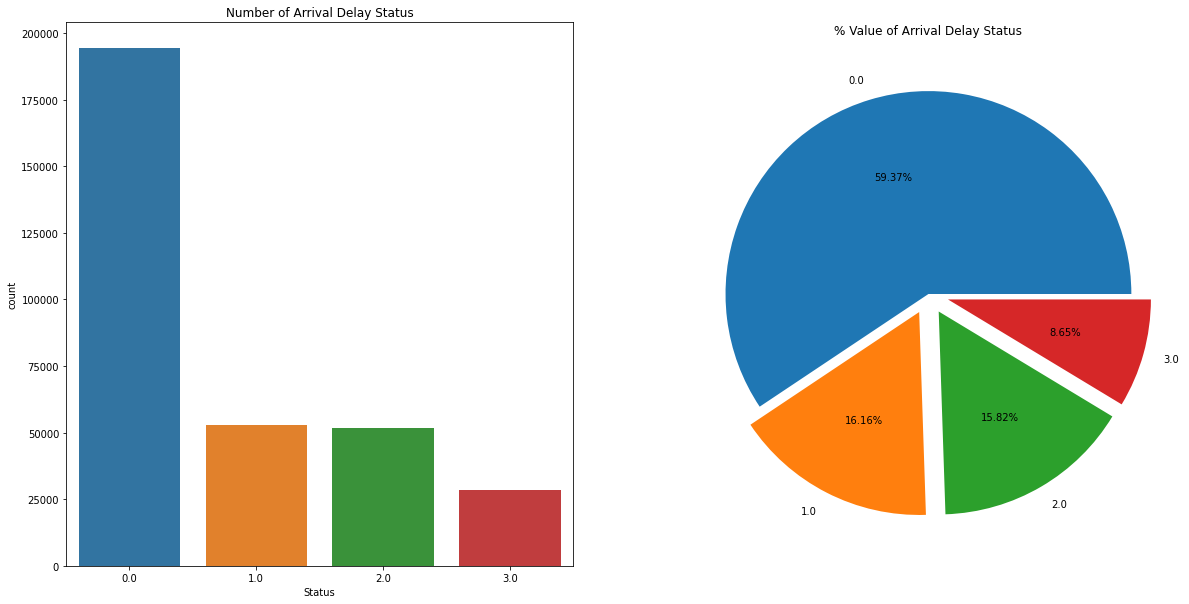

In [91]:
flt_data_cp.loc[flt_data_cp['arr_delay'] <= 0, 'Status'] = 0
flt_data_cp.loc[flt_data_cp['arr_delay'] >= 1, 'Status'] = 1
flt_data_cp.loc[flt_data_cp['arr_delay'] >= 15, 'Status'] = 2
flt_data_cp.loc[flt_data_cp['arr_delay'] >= 60, 'Status'] = 3

## Arrival_delay_status_graph

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))

flt_data_cp['Status'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.2f%%',ax=ax[1],shadow=False)
ax[1].set_title('% Value of Arrival Delay Status')
ax[1].set_ylabel('')
sns.countplot('Status',order = flt_data_cp['Status'].value_counts().index, data=flt_data_cp,ax=ax[0])
ax[0].set_title('Number of Arrival Delay Status')
plt.show()

In [92]:
Delayedflights = flt_data_cp[(flt_data_cp.Status >= 1) &(flt_data_cp.Status <= 3)]

# Average arrival delay by carrier

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


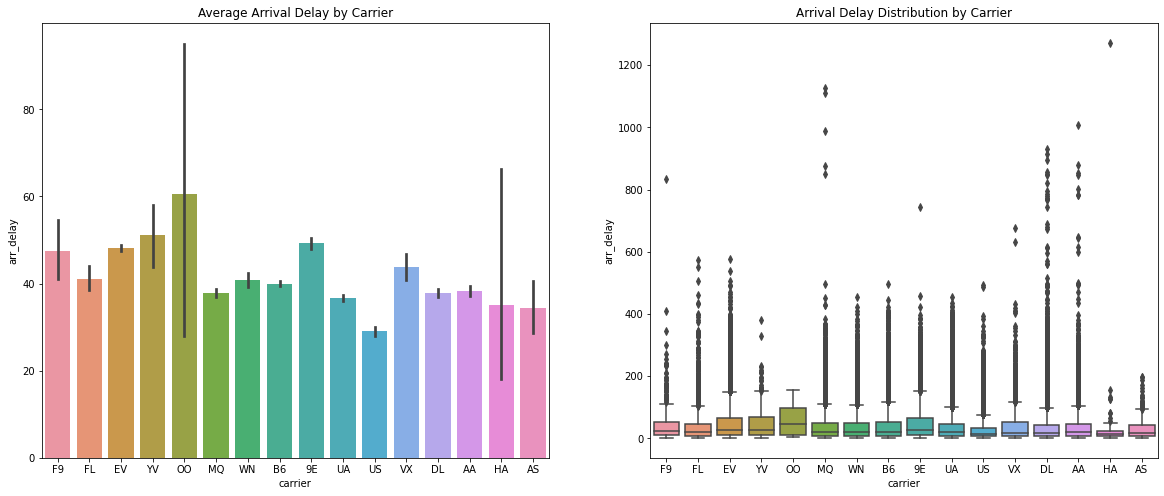

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


In [112]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=Delayedflights,ax=ax[0], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
                                                                                 
ax[0].set_title('Average Arrival Delay by Carrier')
sns.boxplot('carrier','arr_delay', data=Delayedflights,ax=ax[1], order=['F9', 'FL', 'EV', 'YV','OO','MQ','WN','B6',
                                                                                '9E','UA', 'US','VX','DL', 'AA','HA','AS'])
ax[1].set_title('Arrival Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])


The top 5 US airline (American Airlines (AA), Southwest Airlines (WN), Delta Air Lines (DL), United Airlines (UA), Alaska Airlines (AS)generate an average delay of 37.2 minutes. Alaska Airlines, with an 34 minutes per flight, the second lowest of all the carriers.

Carriers with higher average delay generation are Skywest Airlines(OO) with 60 minutes per flight,  Mesa Airlines (YV) with 50 minutes per flight, and Pinnacle Airlines (9E) with 49 minutes per flight. The error bar provide the insight that airlines with low number of flights having higher standard deviation distribution from the mean  (OO, HA, YV, F9, AS); so it seems like size matters.

The boxplot shows, airlines with higher number of flights results having a higher chance of extreme waiting situation. American Eagle Airlines (MQ), American Airlines(AA), Delta Airline(DL) registered the maximum Carrier Delay for 2013 with an exception of Hawaiian Airlines (HA).


# Average departure delay by carrier

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


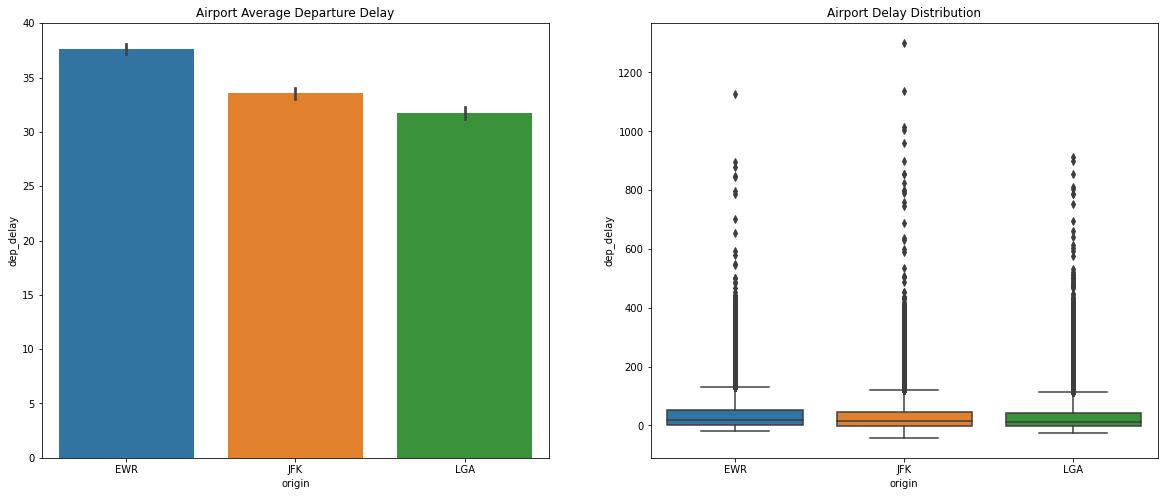

There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from barplot for average departure delay per flight. Considering, the assumption that JFK being a busiest airport among 3 due to international flights; so the maximum departure delay for 2013 is registered by JFK.


In [94]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('origin','dep_delay', data=Delayedflights,ax=ax[0], order=['EWR', 'JFK', 'LGA'])
                                                                                 
ax[0].set_title('Airport Average Departure Delay')
sns.boxplot('origin','dep_delay', data=Delayedflights,ax=ax[1], order=['EWR', 'JFK', 'LGA'])
ax[1].set_title('Airport Delay Distribution')
plt.close(2)
plt.show()

There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from barplot for average departure delay per flight. Considering, the assumption that JFK being a busiest airport among 3 due to international flights; so the maximum departure delay for 2013 is registered by JFK.


In [95]:
scheduled_departure = flight_data.count()['sched_dep_time'] 
actual_departure = flight_data.count()['dep_time']  
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper
                                            
print("Sched_dep: ", scheduled_departure)
print("Operated: ", actual_departure)
print("Cancelled: ", cancel_departure)
print("\n")
print("Ratio operated flights over scheduled flights: %s" % ratio_oper)
print("Ratio of cancelled flights: %s" % ratio_cancel)

Sched_dep:  336776
Operated:  328521
Cancelled:  8255


Ratio operated flights over scheduled flights: 97.54881583010666
Ratio of cancelled flights: 2.451184169893338


# The day and month having highest average delay departure by 

In [96]:
Delay_Day=flt_data_cp.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
Delay_Day_max=Delay_Day['dep_delay'].max()
Delay_Day_info=Delay_Day[Delay_Day['dep_delay']==Delay_Day_max]
print("The day and month having highest delay by average for departures" '\n' ,Delay_Day_info)

The day and month having highest delay by average for departures
     day  month  dep_delay
86    8      3      83.65


# The day and month having highest number of flight delay

In [97]:
max_flightdelay_day=flt_data_cp[flt_data_cp['dep_delay'] > 0].groupby(['day','month'], as_index=False).agg({'flight': 'count'})
max_flightdelay_info = max_flightdelay_day[max_flightdelay_day['flight'].max() == max_flightdelay_day['flight']]
print("Day and month which have highest number of flight delay" '\n' ,max_flightdelay_info)

Day and month which have highest number of flight delay
      day  month  flight
275   23     12     673


# Histogram for arrival and departure delay

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


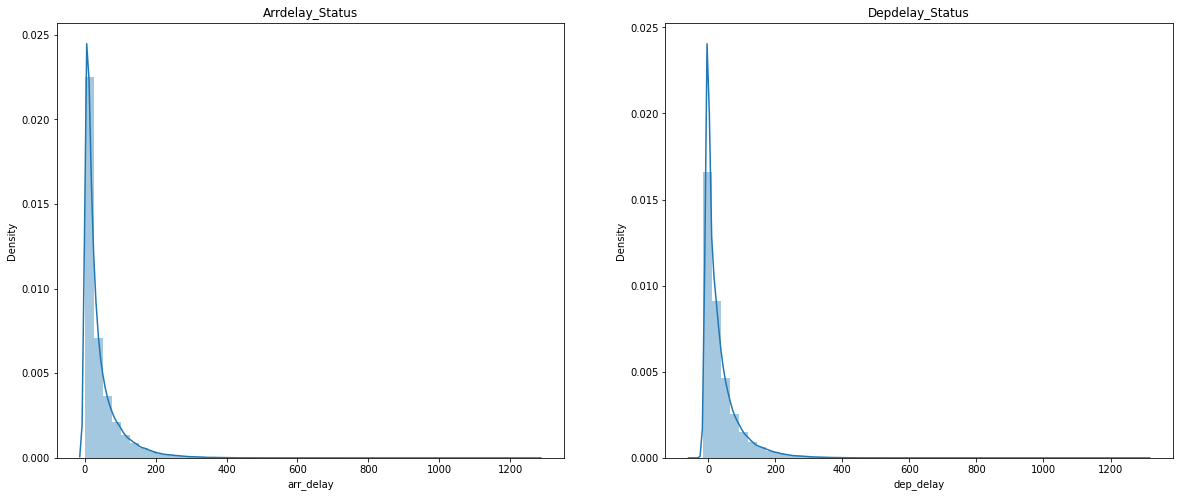

Skewness_arr: 3.433909
Kurtosis_arr: 24.606943
Skewness_dep: 3.250293
Kurtosis_dep: 22.521400


It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.


The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.


In [98]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(Delayedflights['arr_delay'], ax=ax[0])

ax[0].set_title('Arrdelay_Status')

sns.distplot(Delayedflights['dep_delay'], ax=ax[1])
ax[1].set_title('Depdelay_Status')
plt.show()

print("Skewness_arr: %f" % Delayedflights['arr_delay'].skew())
print("Kurtosis_arr: %f" % Delayedflights['arr_delay'].kurt())
print("Skewness_dep: %f" % Delayedflights['dep_delay'].skew())
print("Kurtosis_dep: %f" % Delayedflights['dep_delay'].kurt())
print('\n')

It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.
The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

# Get the top 5 destinations where flights arrives early than expected arrival time

Top 5 destinations where flights arrives early than expected arrival time 



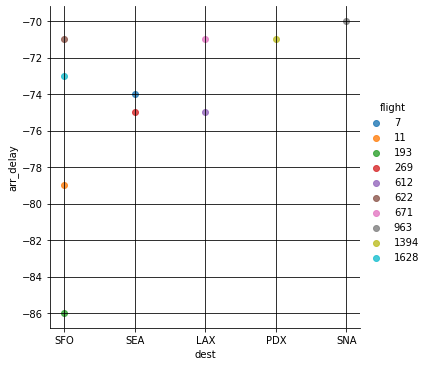

In [99]:

Ontime_Early_flights =flt_data_cp[(flt_data_cp.Status <= 0)]

top10flight=(Ontime_Early_flights.sort_values(['arr_delay'], ascending=True)).head(10)
top10flight_details=pd.DataFrame(top10flight, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','flight_speed'])
print("Top 5 destinations where flights arrives early than expected arrival time",'\n')


sns.lmplot(x = 'dest', y='arr_delay', data = top10flight_details, fit_reg=False, hue="flight")

plt.grid(True, color='k')

plt.show()

# Best airport in terms of early departure from NYC

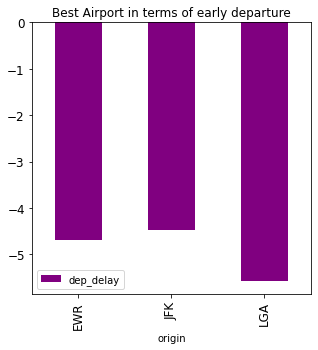

In [100]:
airport_info = pd.DataFrame(flt_data_cp,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_origin = airport_info[airport_info['dep_delay']<0]
best_airport = airport_origin.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar',color='purple', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

# Line Graph for Avg_Monthly delay of a/c  and Number of minutes delayed by month (excluding staus 0)

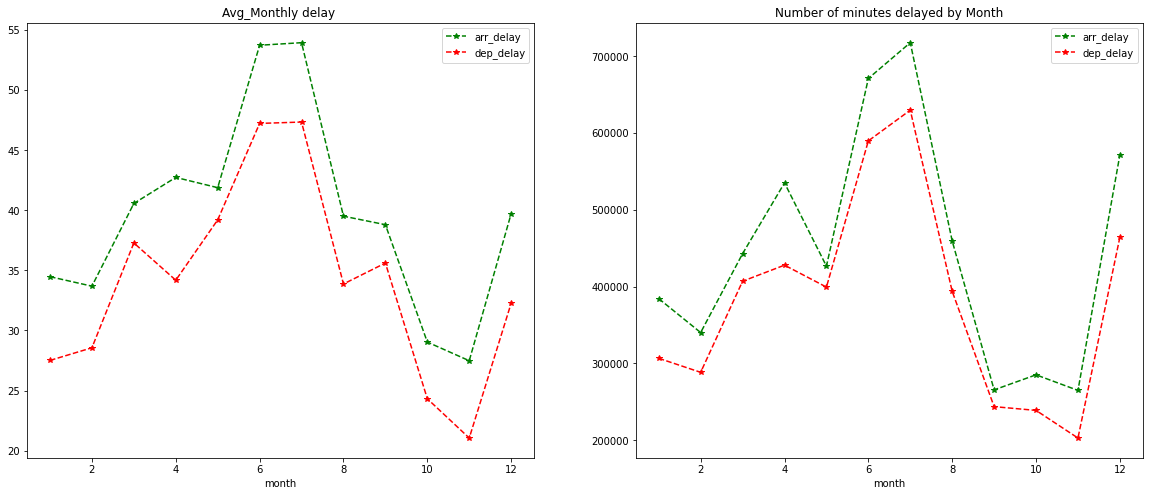

In [101]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly delay ')
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Number of minutes delayed by Month')
plt.show()

# Monthly_Delays of Ontime_Early_ Flights (only for status 0)

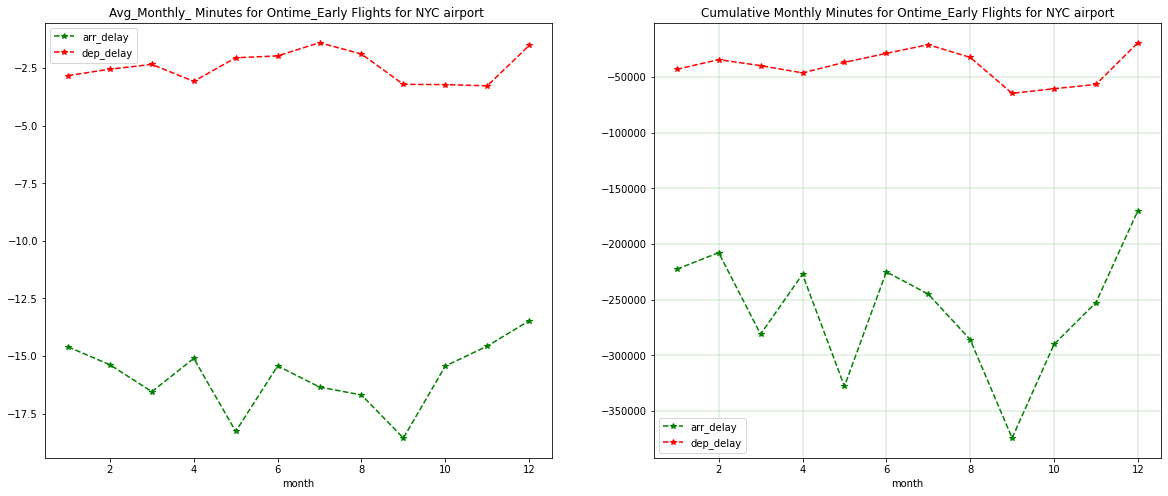

In [102]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly_ Minutes for Ontime_Early Flights for NYC airport ')


Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Cumulative Monthly Minutes for Ontime_Early Flights for NYC airport')
plt.grid(True, color='g',linewidth='0.2')
plt.show()

# Flight Speed Analysis 

In [103]:
flight_speed =flt_data_cp['distance'] / (flt_data_cp['air_time']/60)
flt_data_cp['flight_speed'] =flight_speed
flt_data_cp.sort_values(by='flight_speed', ascending=False).head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc,Status,flight_speed
216447,2013,5,25,1709.00,1700,9.00,1923.00,1937,-14.00,DL,1499,N666DN,LGA,ATL,65.00,762,17,0,25-05-2013 17:00,2013-05-25,05- May,0.00,703.38
251999,2013,7,2,1558.00,1513,45.00,1745.00,1719,26.00,EV,4667,N17196,EWR,MSP,93.00,1008,15,13,2/7/2013 15:00,2013-07-02,07- July,2.00,650.32
205388,2013,5,13,2040.00,2025,15.00,2225.00,2226,-1.00,EV,4292,N14568,EWR,GSP,55.00,594,20,25,13-05-2013 20:00,2013-05-13,05- May,0.00,648.00
157516,2013,3,23,1914.00,1910,4.00,2045.00,2043,2.00,EV,3805,N12567,EWR,BNA,70.00,748,19,10,23-03-2013 19:00,2013-03-23,03- March,1.00,641.14
10223,2013,1,12,1559.00,1600,-1.00,1849.00,1917,-28.00,DL,1902,N956DL,LGA,PBI,105.00,1035,16,0,12/1/2013 16:00,2013-01-12,01- January,0.00,591.43


# Top 5 fastest flights details from NYC

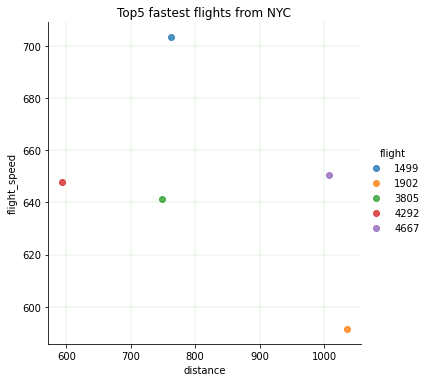

,flight,tailnum,distance,air_time,flight_speed
216447,1499,N666DN,762,65.00,703.38
251999,4667,N17196,1008,93.00,650.32
205388,4292,N14568,594,55.00,648.00
157516,3805,N12567,748,70.00,641.14
10223,1902,N956DL,1035,105.00,591.43


In [104]:
speed_5=flt_data_cp.loc[:, ['flight', 'tailnum','distance','air_time','flight_speed']].sort_values(by='flight_speed',ascending=False,axis=0).head(5)
sns.lmplot(x = 'distance', y='flight_speed', data = speed_5, fit_reg=False, hue="flight")
plt.grid(True, color='g', linewidth=0.1)
plt.title("Top5 fastest flights from NYC")
plt.show()
speed_5

In [105]:
Carrier_hmap=flt_data_cp.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute','DATE',
                              'time_hour','month','year','origin','dest','tailnum','Status',
                                 'distance','flight','air_time'], axis=1)
Carrier_hmap.head()

,day,dep_delay,arr_delay,carrier,MONTH_desc,flight_speed
0,1,2.00,11.00,UA,01- January,370.04
1,1,4.00,20.00,UA,01- January,374.27
2,1,2.00,33.00,AA,01- January,408.38
3,1,-1.00,-18.00,B6,01- January,516.72
4,1,-6.00,-25.00,DL,01- January,394.14


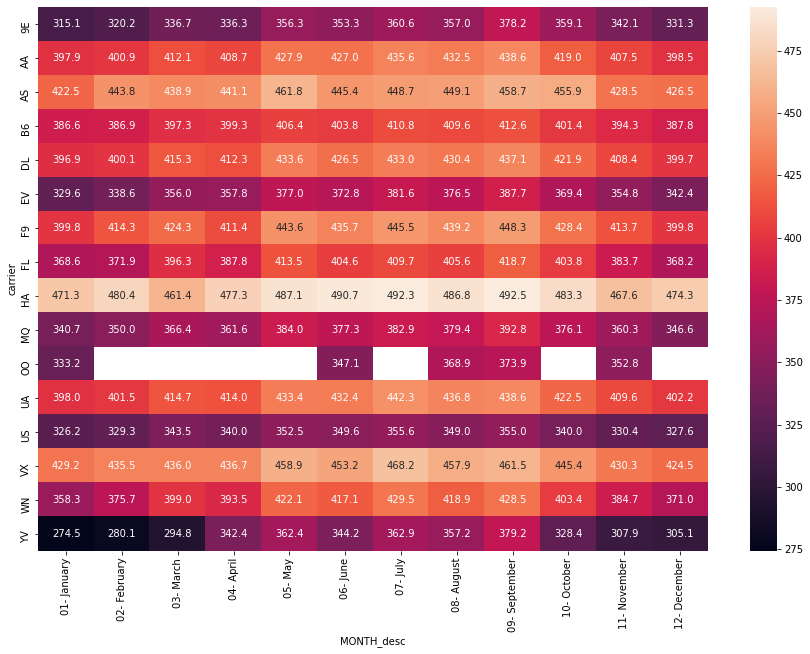

The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.


In [106]:
Carrier_hmap_OO = pd.pivot_table(Carrier_hmap,values='flight_speed', aggfunc='mean', index='carrier',columns='MONTH_desc')
Carrier_hmap_OO.head()

plt.figure(figsize=(15,10))
sns.heatmap(Carrier_hmap_OO,annot=True, fmt=".1f")
plt.show()

The peak season for air travel in USA is considered to be June to August  and lean season is mid of January to February. The airlines operate highest number of flights and carry maximum PAX load during the summer season and vis-à-vis during lean season. The data proves that the statement is true and most of the airlines having maximum departure between May to August and minimum between January to February. From, the heatmap, it is visible that during May to August most of the airlines tend to fly faster than normal flight speed, to cover maximum departure. Whereas, it is vis-à-vis during lean season.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


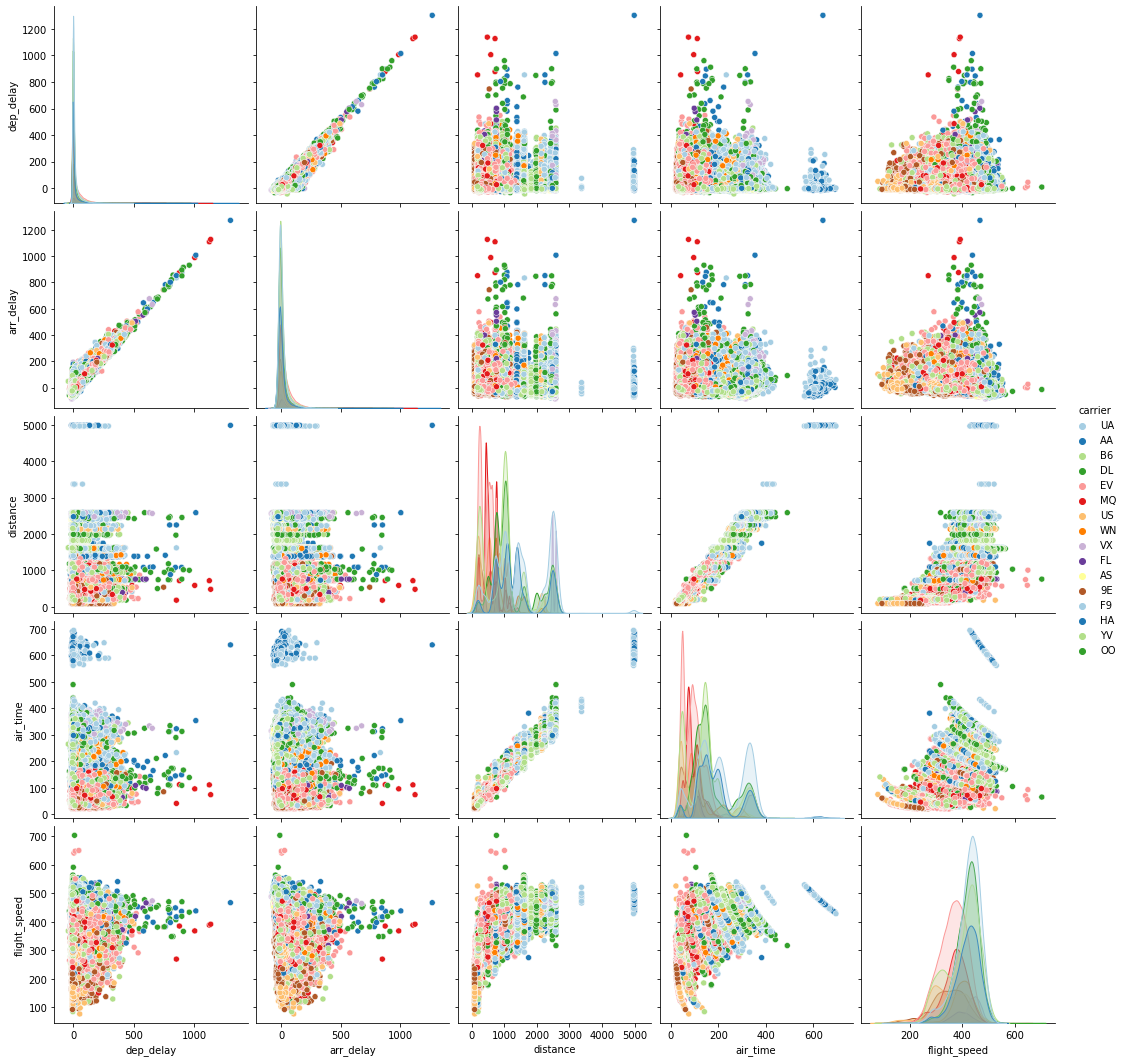

In [107]:
Airlines_info= sns.pairplot(flt_data_cp, height=3,
                            vars=['dep_delay','arr_delay','distance','air_time','flight_speed'], hue='carrier', palette="Paired")
plt.show(Airlines_info)

In [108]:
flt_corr= flt_data_cp.drop(['dep_time','sched_dep_time','arr_time','sched_arr_time','hour','minute',
                              'time_hour','DATE','MONTH_desc','year','flight'], axis=1)

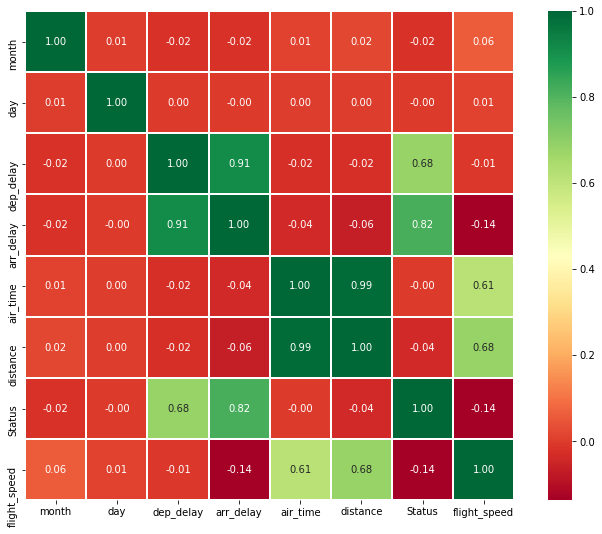

The coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.


In [109]:
corrmat = flt_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()

The above coorelation matrix provide the result that the departure and arrival delay are positively and strongly coorelated. Similarly with air time and flight distance; So they tend to move in the same direction. Whereas  correlation between fightspeed, airtime, flightdistance are positive but not so strong enough to influence each other.


# Conclusion
The dataset doesn't offer reasons for delays and missing important data such as taxi in and out, flight diversion, chocks on and off timing, and fuel consumption. So, it is clear that the dataset doesn't provide clear understanding of delay issues, which may be supportive to look into delays that can be controlled or reduced.

For example: If airlines permits pilots to fly aircraft at higher speed and fuel consumption on planes that departed late, the delay spread can be minimize along the flight network. This would decrease the possible delay itself and significatively reduced the number of aircraft delays.

A solution applicable to one type of delay may affect the others, resulting in a ripple effect that will allow more efficient operations; benefiting passengers, airports, carriers and even the world as a whole.

In [110]:
print('END')

END
